In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
os.getcwd()

'C:\\Users\\IMashudu'

In [3]:
data=pd.read_excel('flyzy.xlsx')

In [4]:
data

,Flight ID,Airline,Flight_Distance,Origin_Airport,Destination_Airport,Scheduled_Departure_Time,Day_of_Week,Month,Airplane_Type,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
0,7319483,Airline D,475,Airport 3,Airport 2,4,6,1,Type C,0.225122,5.00000,2.151974,0.477202,0
1,4791965,Airline E,538,Airport 5,Airport 4,12,1,6,Type B,0.060346,68.00000,1.600779,0.159718,1
2,2991718,Airline C,565,Airport 1,Airport 2,17,3,9,Type C,0.093920,18.00000,4.406848,0.256803,0
3,4220106,Airline E,658,Airport 5,Airport 3,1,1,8,Type B,0.656750,13.00000,0.998757,0.504077,1
4,2263008,Airline E,566,Airport 2,Airport 2,19,7,12,Type E,0.505211,4.00000,3.806206,0.019638,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1265781,Airline D,395,Airport 2,Airport 3,0,6,1,Type B,0.190018,1.00000,2.451216,0.283440,1
2996,5440150,Airline E,547,Airport 1,Airport 4,22,4,7,Type E,0.719271,91.00000,0.027039,0.665294,1
2997,779080,Airline C,461,Airport 1,Airport 3,8,3,1,Type B,0.458724,3.00000,1.131315,0.991307,0
2998,4044431,Airline B,464,Airport 3,Airport 3,5,5,3,Type E,0.443373,46.00000,0.968651,0.254808,1


In [5]:
df=data

In [6]:
df.head(), df.dtypes


(   Flight ID    Airline  Flight_Distance Origin_Airport Destination_Airport  \
 0    7319483  Airline D              475      Airport 3           Airport 2   
 1    4791965  Airline E              538      Airport 5           Airport 4   
 2    2991718  Airline C              565      Airport 1           Airport 2   
 3    4220106  Airline E              658      Airport 5           Airport 3   
 4    2263008  Airline E              566      Airport 2           Airport 2   
 
    Scheduled_Departure_Time  Day_of_Week  Month Airplane_Type  Weather_Score  \
 0                         4            6      1        Type C       0.225122   
 1                        12            1      6        Type B       0.060346   
 2                        17            3      9        Type C       0.093920   
 3                         1            1      8        Type B       0.656750   
 4                        19            7     12        Type E       0.505211   
 
    Previous_Flight_Delay_Minu

In [7]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the label encoder
label_encoder = LabelEncoder()

# List of categorical columns to be label encoded
categorical_columns = ['Airline', 'Origin_Airport', 'Destination_Airport', 'Airplane_Type']

# Apply label encoding to the selected columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the first few rows of the encoded dataframe
df.head()

,Flight ID,Airline,Flight_Distance,Origin_Airport,Destination_Airport,Scheduled_Departure_Time,Day_of_Week,Month,Airplane_Type,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
0,7319483,3,475,2,0,4,6,1,2,0.225122,5.0,2.151974,0.477202,0
1,4791965,4,538,4,2,12,1,6,1,0.060346,68.0,1.600779,0.159718,1
2,2991718,2,565,0,0,17,3,9,2,0.093920,18.0,4.406848,0.256803,0
3,4220106,4,658,4,1,1,1,8,1,0.656750,13.0,0.998757,0.504077,1
4,2263008,4,566,1,0,19,7,12,4,0.505211,4.0,3.806206,0.019638,0


In [8]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

# Select the columns to be scaled (exclude the target column 'Flight_Cancelled')
columns_to_scale = df.columns.drop('Flight_Cancelled')

# Apply MinMax scaling to the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the first few rows of the scaled dataframe
df.head()

,Flight ID,Airline,Flight_Distance,Origin_Airport,Destination_Airport,Scheduled_Departure_Time,Day_of_Week,Month,Airplane_Type,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
0,0.731922,0.75,0.464187,0.50,0.000000,0.173913,0.833333,0.000000,0.50,0.204098,0.019305,0.414704,0.424191,0
1,0.479052,1.00,0.550964,1.00,0.666667,0.521739,0.000000,0.454545,0.25,0.054067,0.262548,0.308479,0.141360,1
2,0.298943,0.50,0.588154,0.00,0.000000,0.739130,0.333333,0.727273,0.50,0.084637,0.069498,0.849258,0.227848,0
3,0.421839,1.00,0.716253,1.00,0.333333,0.043478,0.000000,0.636364,0.25,0.597101,0.050193,0.192458,0.448133,1
4,0.226038,1.00,0.589532,0.25,0.000000,0.826087,1.000000,1.000000,1.00,0.459123,0.015444,0.733504,0.016569,0


In [9]:
X = df.drop(columns='Flight_Cancelled')  # Features
y = df['Flight_Cancelled']  # Target

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
y_pred = model.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n {cm}')

report = classification_report(y_test, y_pred)
print(f'Classification Report:\n {report}')

Accuracy: 0.7983333333333333
Confusion Matrix:
 [[108  79]
 [ 42 371]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.58      0.64       187
           1       0.82      0.90      0.86       413

    accuracy                           0.80       600
   macro avg       0.77      0.74      0.75       600
weighted avg       0.79      0.80      0.79       600



Accuracy: 0.7983333333333333
Confusion Matrix:
 [[108  79]
 [ 42 371]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.58      0.64       187
           1       0.82      0.90      0.86       413

    accuracy                           0.80       600
   macro avg       0.77      0.74      0.75       600
weighted avg       0.79      0.80      0.79       600

ROC-AUC Score: 0.8641607644598672


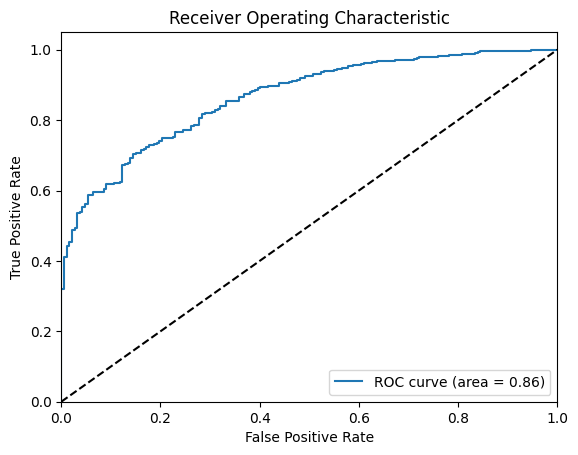

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n {cm}')

# Classification Report (Precision, Recall, F1-Score)
report = classification_report(y_test, y_pred)
print(f'Classification Report:\n {report}')

# ROC-AUC Score
y_pred_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC-AUC Score: {roc_auc}')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
